In [1]:
from skimage import io, color, data
from skimage.transform import radon, iradon
import numpy as np
import matplotlib.pyplot as plt

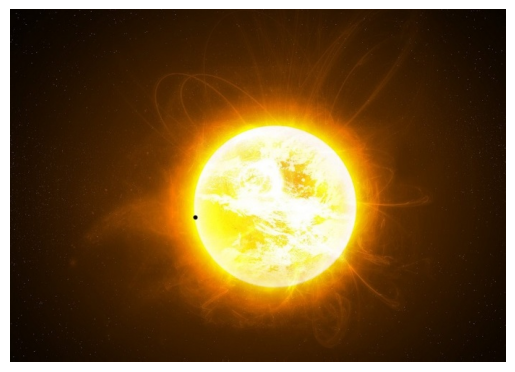

In [21]:
image = io.imread('sun.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [22]:
image = color.rgb2gray(image)

In [23]:
# Normalize to [0,1]
image = image.astype(float)/255.0

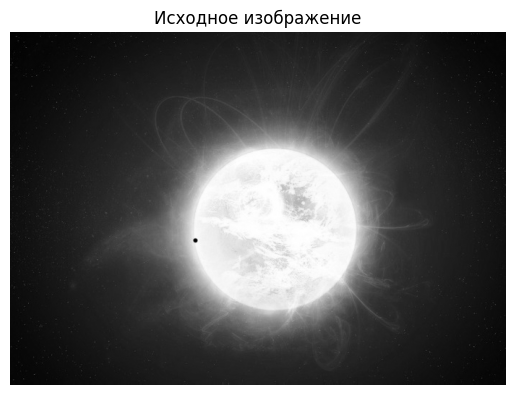

In [24]:
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

###Преобразование Радона

In [50]:
steps = [1, 5, 10]
reconstructed_array = []

for i, step in enumerate(steps):
    theta = np.arange(0, 180, step)
    sinogram = radon(image, theta=theta)

    reconstructed = iradon(sinogram, theta=theta, filter_name='ramp')
    reconstructed_array.append(reconstructed)

###Визуализация

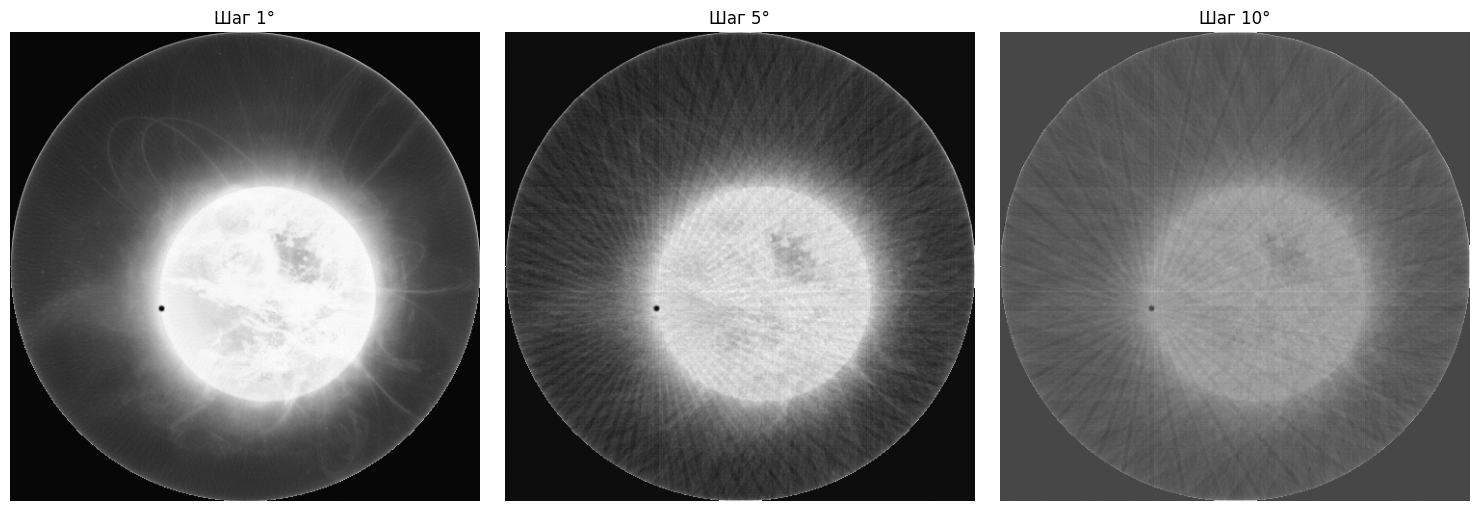

In [52]:
fig, axes = plt.subplots(1, len(steps), figsize=(15, 5))

for i, ax in enumerate(axes):
    ax.imshow(reconstructed_array[i], cmap='gray')
    ax.set_title(f'Шаг {steps[i]}°')
    ax.axis('off')

plt.tight_layout()
plt.show()